In [114]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [136]:
y = df['Unemployment rate Woman']
# africa = df.loc[df['Continent'] == 'Africa']
# europe = df.loc[df["Continent"] == "Europe"]
# south_america = df.loc[df["Continent"] == "South America"]
# north_america = df.loc[df["Continent"] == "North America"]
# oceania = df.loc[df["Continent"] == "Oceania"]

df = pd.read_excel('data.xlsx')
df = df.dropna()

africa = df.loc[df['Continent'] == 'Africa']
africa = africa.groupby('Date')['Unemployment rate Woman'].sum().to_frame()

europe = df.loc[df["Continent"] == "Europe"]
europe = europe.groupby('Date')['Unemployment rate Woman'].sum().to_frame()

south_america = df.loc[df["Continent"] == "South America"]
south_america = south_america.groupby('Date')['Unemployment rate Woman'].sum().to_frame()

north_america = df.loc[df["Continent"] == "North America"]
north_america = north_america.groupby('Date')['Unemployment rate Woman'].sum().to_frame()

oceania = df.loc[df["Continent"] == "Oceania"]
oceania = oceania.groupby('Date')['Unemployment rate Woman'].sum().to_frame()

In [137]:
# y_africa = africa['Unemployment rate Woman']
# y_europe = europe['Unemployment rate Woman']
# y_south_america = south_america['Unemployment rate Woman']
# y_north_america = north_america['Unemployment rate Woman']
# y_oceania = oceania['Unemployment rate Woman']

In [138]:
from pylab import rcParams

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [139]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                    continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3017.6685148782644
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2732.204053157546
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2568.2988004989666
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2347.561686383735
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2527.885002064372
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2392.496642570747
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2438.678457511929
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2348.616997145166
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2615.896587439933
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2409.3570050505145
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2329.055799135458
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2091.810652825899
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2279.9209187383403
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2131.2187443976422
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2200.2863093833103
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2093.8085189078097
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1906.358144539699
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1857.5591580769874
AR

In [143]:
mod = sm.tsa.statespace.SARIMAX(africa,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                #enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9088      2.105     -0.432      0.666      -5.034       3.216
ma.L1        -18.0577    520.163     -0.035      0.972   -1037.559    1001.443
ar.S.L12      -0.9612      2.474     -0.389      0.698      -5.809       3.887
sigma2         0.0059      0.530      0.011      0.991      -1.033       1.045


In [144]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1152x576 with 0 Axes>

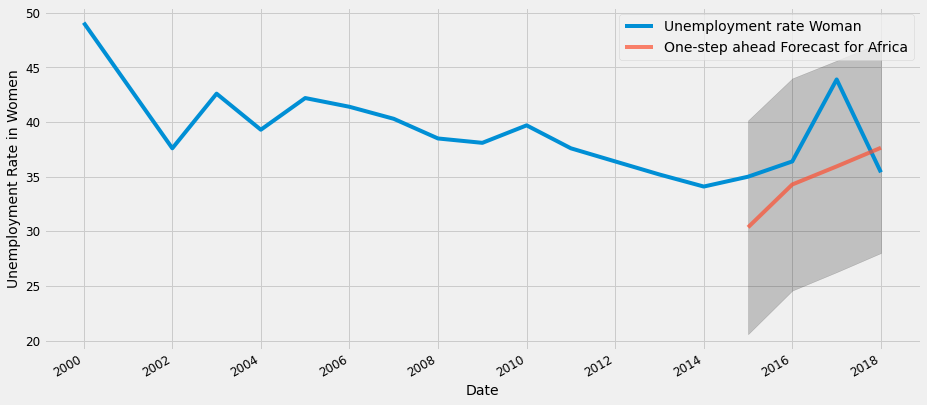

In [146]:
pred = results.get_prediction(start='2015-01-01', dynamic=False)       
pred_ci = pred.conf_int()
ax = africa['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast for Africa', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate in Women')
plt.legend()
plt.show()

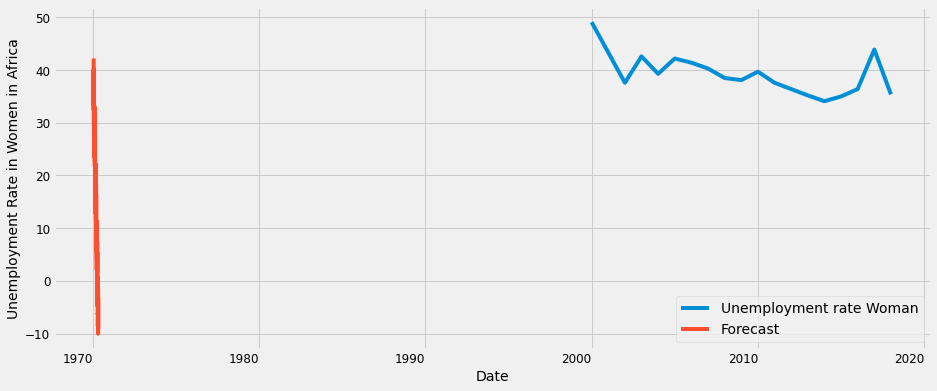

In [149]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = africa.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate in Women in Africa')
plt.legend()
plt.show()

In [150]:
mod = sm.tsa.statespace.SARIMAX(north_america,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                #enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4545      0.002   -246.607      0.000      -0.458      -0.451
ma.L1          1.2279      0.005    232.946      0.000       1.218       1.238
ar.S.L12    8.024e-10      1.111   7.23e-10      1.000      -2.177       2.177
sigma2         0.0014   9.25e-06    147.204      0.000       0.001       0.001


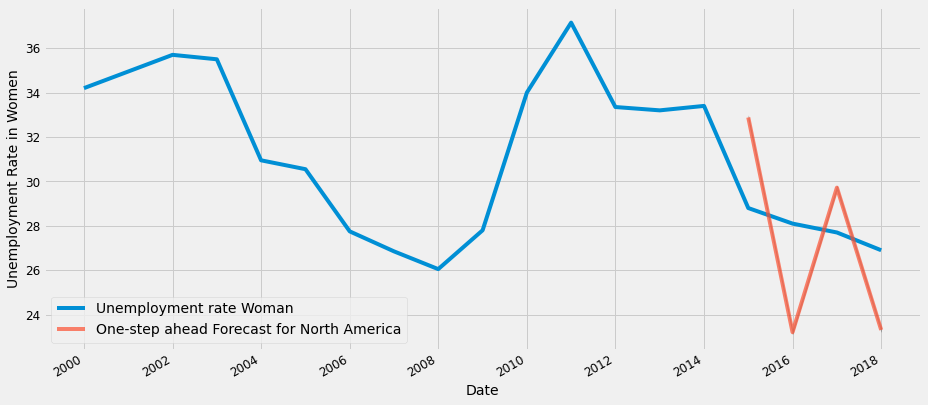

In [152]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)       
pred_ci = pred.conf_int()
ax = north_america['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast for North America', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate in Women')
plt.legend()
plt.show()

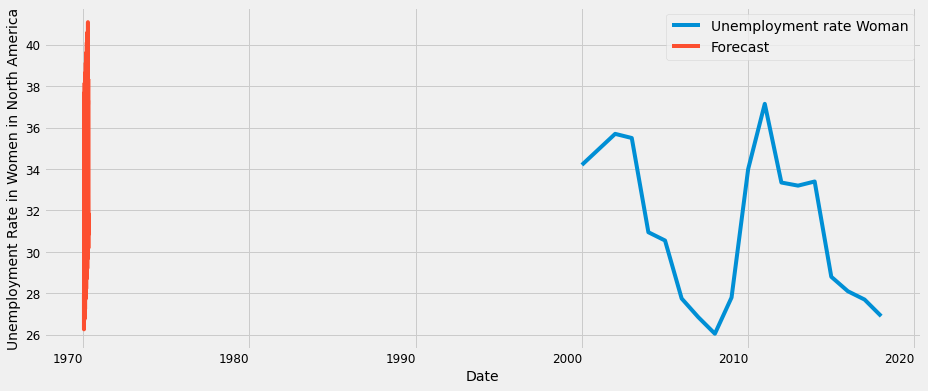

In [153]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = north_america.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate in Women in North America')
plt.legend()
plt.show()

In [154]:
mod = sm.tsa.statespace.SARIMAX(south_america,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                #enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3185      2.216      0.144      0.886      -4.025       4.663
ma.L1          0.9998   8099.070      0.000      1.000   -1.59e+04    1.59e+04
ar.S.L12      -0.4211   7103.190  -5.93e-05      1.000   -1.39e+04    1.39e+04
sigma2         7.6406   2.67e+04      0.000      1.000   -5.23e+04    5.23e+04


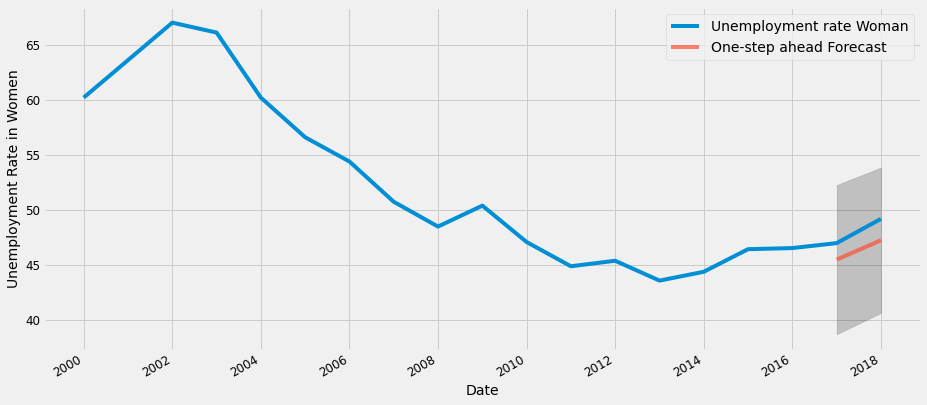

In [156]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)       
pred_ci = pred.conf_int()
ax = south_america['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate in Women')
plt.legend()
plt.show()